In [4]:
# load data
# abhi

from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
from tqdm import tqdm

x = []
x_load = []
y = []
y_load = []


def load_data():
    count = 0
    for file in tqdm(os.listdir("/home/abhi/mainproject/quickdraw/data")):
        file = "/home/abhi/mainproject/quickdraw/data//" + file
        print(file)
        x = np.load(file)
        x = x.astype('float32') / 255.
        x = x[0:10000, :]
        x_load.append(x)
        y = [count for _ in range(10000)]
        count += 1
        y = np.array(y).astype('float32')
        y = y.reshape(y.shape[0], 1)
        y_load.append(y)

    return x_load, y_load


features, labels = load_data()

features = np.array(features).astype('float32')
labels = np.array(labels).astype('float32')

# shape[0] number numpy files
# shape[1] 10000
features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
# number of files * 10000 *784
# print(features.shape)

labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])
# c=0
# d=0
# f=0
# for i in labels:
#     if (i ==2) and (c==0): 
#         print ("two")
#         c=1

#     if i==1 and d==0:
#         print("one")
#         d=1
#     if i==0 and f==0:
#         print("zero")
#         f=1

with open("features", "wb") as f:
    pickle.dump(features, f, protocol=2)
with open("labels", "wb") as f:
    pickle.dump(labels, f, protocol=2)


  0%|          | 0/8 [00:00<?, ?it/s]

/home/abhi/mainproject/quickdraw/data//envelope.npy


 12%|█▎        | 1/8 [00:00<00:06,  1.07it/s]

/home/abhi/mainproject/quickdraw/data//cloud.npy


 25%|██▌       | 2/8 [00:01<00:04,  1.38it/s]

/home/abhi/mainproject/quickdraw/data//apple.npy


 38%|███▊      | 3/8 [00:02<00:04,  1.10it/s]

/home/abhi/mainproject/quickdraw/data//star.npy


 50%|█████     | 4/8 [00:04<00:05,  1.33s/it]

/home/abhi/mainproject/quickdraw/data//hotairballoon.npy


 62%|██████▎   | 5/8 [00:19<00:16,  5.48s/it]

/home/abhi/mainproject/quickdraw/data//car.npy


 75%|███████▌  | 6/8 [00:43<00:21, 10.82s/it]

/home/abhi/mainproject/quickdraw/data//smileyface.npy


 88%|████████▊ | 7/8 [01:13<00:16, 16.54s/it]

/home/abhi/mainproject/quickdraw/data//grapes.npy


100%|██████████| 8/8 [01:51<00:00, 23.01s/it]


(784,)
(28, 28)


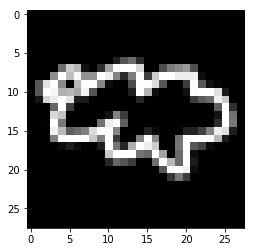

In [2]:
# Data loading manupulation
# image from dataset printing
# abhi
import numpy as np
from matplotlib import pyplot as plt
import os 
files = "/home/abhi/mainproject/quickdraw/data/cloud.npy"
x = np.load(files)
print(x[0].shape)
img=np.array(x[1000])
img=np.reshape(img,(28,28))
print(img.shape)
# print(img)
plt.imshow(img,cmap="gray")
plt.show()

shape (8000, 784)
shape1 (8000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (Non

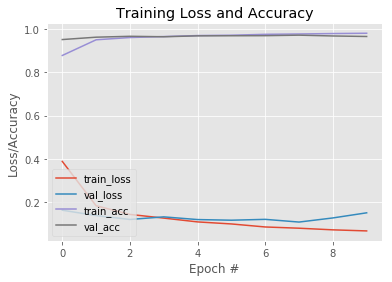

In [2]:
# modelcreation
# abhi

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Dense,Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.utils import np_utils, print_summary
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pickle
from keras.callbacks import TensorBoard
from matplotlib import pyplot as plt


def keras_model(image_x, image_y):
    num_of_classes = 8
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    filepath = "QuickDraw.h5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint]

    return model, callbacks_list


def loadFromPickle():
    with open("features", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels



def prepress_labels(labels):
    labels = np_utils.to_categorical(labels)
    return labels


def main():
    features, labels = loadFromPickle()
    features, labels = shuffle(features, labels)
    labels=prepress_labels(labels)
#     print ("labels prepress",labels[1])
    train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,                                                     test_size=0.1)
    print("shape",test_x.shape)
    train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
    test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
    print("shape1",test_x.shape)
#     print("train_x[1]",train_x[0])
    model, callbacks_list = keras_model(28,28)
    print_summary(model)
    H=model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=64,
              callbacks=[TensorBoard(log_dir="QuickDraw")])
    
    model.save('QuickDraw.h5')
    plt.style.use("ggplot")
    plt.figure()
    N = 10
    plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
    plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("plot")


main()


In [ ]:
import cv2
from keras.models import load_model
import numpy as np
from matplotlib import pyplot as plt
import tkinter
from tkinter import messagebox

window=tkinter.Tk()
width=400
height=200
screen_width=window.winfo_screenwidth()
screen_height=window.winfo_screenheight()
x_cord=(screen_width/2)-(width/2)
y_cord=(screen_height/2)-(height/2)
window.geometry("%dx%d+%d+%d" % (width,height,x_cord,y_cord))
window.withdraw()
def keras_process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

test1=cv2.imread("test/envelope.jpg",0)

model=load_model("QuickDraw.h5")

print("before processs",test1.shape)
plt.imshow(test1,cmap="gray")
plt.show()

digit=cv2.bitwise_not(test1)
processed = keras_process_image(digit)
print("new image",processed.shape)

print("processed: " + str(processed.shape))
pred_probab = model.predict(processed)[0]
print("prob",pred_probab)
pred_class = list(pred_probab).index(max(pred_probab))
print("class",pred_class)
if pred_class ==0 :
    print("the doodle is star")
    result=messagebox.askyesno("Prediction","did u draw a envelope")
    
elif pred_class ==1:
    print("the doodle is Envelope")
elif pred_class==2:
    print("the doodle is star")
window.mainloop()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
before processs (480, 670)


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [1. 0. 0. 0. 0. 0. 0. 0.]
class 0
the doodle is star


In [1]:
# drawing  using pen
# abhi

import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt
from keras.models import load_model
import os

model=load_model("QuickDraw.h5")

def keras_process_image(img,image_x = 28,image_y = 28):

    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

# Define the upper and lower boundaries for a color to be considered "Blue"
blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])

# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=512)

# Setup the Paint interface
paintWindow = np.zeros((480,670,3)) + 255 #paint window

# cv2.imshow(i,paintWindow)



x=0
# Load the video
camera = cv2.VideoCapture(0)

# Keep looping
while True:
    # Grab the current paintWindow
    key = cv2.waitKey(1)
    (grabbed, frame) = camera.read()
    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Check to see if we have reached the end of the video
    if not grabbed:
        break

    # Determine which pixels fall within the blue boundaries and then blur the binary image
    blueMask = cv2.inRange(hsv, blueLower, blueUpper)
    blueMask = cv2.erode(blueMask, kernel, iterations=2)
    blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
    blueMask = cv2.dilate(blueMask, kernel, iterations=1)

    # Find contours in the image
    cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
    	cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Check to see if any contours were found
    if len(cnts) > 0:
    	# Sort the contours and find the largest one -- we
    	# will assume this contour correspondes to the area of the bottle cap
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Get the moments to calculate the center of the contour (in this case Circle)
        M = cv2.moments(cnt)
        
        #finding the center of the circle
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
#     press b to pause drawing
    if key & 0xFF != ord('b'):
       
        points.appendleft(center)
    else:
        points.appendleft(None)
    # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
    for i in range(1,len(points)):
        if points[i-1] is None or points[i] is None:
            continue
        cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
        cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 13)
                

    # Show the frame and the paintWindow image
    cv2.imshow("Tracking_frame", frame)
    cv2.imshow("PaintWindow", paintWindow)
    
    if key & 0xFF == ord('r'):
        points = deque(maxlen=512)
        paintWindow[:,:,:] = 255
    if key & 0xFF == ord('c'):
#             plt.imshow(paintWindow)
#             plt.show() 
            cv2.imwrite(str(x)+".jpg",paintWindow)
    if key & 0xFF == ord('p'):
#         plt.imshow(paintWindow)
#         plt.show() 
        cv2.imwrite(str(x)+".jpg",paintWindow)
        i=cv2.imread(str(x)+".jpg",0)
#         i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
        digit=cv2.bitwise_not(i)
        plt.imshow(digit,cmap="gray")
        plt.show()
        processed = keras_process_image(digit)
        print("new image",processed.shape)
        
        print("processed: " + str(processed.shape))
        pred_probab = model.predict(processed)[0]
        print("prob",pred_probab)
        pred_class = list(pred_probab).index(max(pred_probab))
        print("class",pred_class)
        if pred_class ==3 :
            print("the doodle is star")
            cv2.putText(paintWindow, "prediction : star", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)
        elif pred_class ==0:
            print("the doodle is envelope")
            cv2.putText(paintWindow, "prediction : envelope", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)
        elif pred_class==2:
            print("the doodle is ENVELOPE")
            cv2.putText(paintWindow, "prediction : car", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)

        os.remove(str(x)+".jpg")
	# If the 'q' key is pressed, stop the loop
    if key == 27:
        break

# Cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [1. 0. 0. 0. 0. 0. 0. 0.]
class 0
the doodle is envelope


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 1. 0. 0.]
class 5


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [1. 0. 0. 0. 0. 0. 0. 0.]
class 0
the doodle is envelope


In [ ]:
# drawing  using pen
# abhi
#for final

import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt
from keras.models import load_model
import os
import tkinter
from tkinter import messagebox


# for displaying prediction messagebox
window=tkinter.Tk()
width=400
height=200
screen_width=window.winfo_screenwidth()
screen_height=window.winfo_screenheight()
x_cord=(screen_width/2)-(width/2)
y_cord=(screen_height/2)-(height/2)
window.geometry("%dx%d+%d+%d" % (width,height,x_cord,y_cord))
window.withdraw()
message=["envelope","cloud","apple","star","hotairballoon","car","smileyface","grapes"]
model=load_model("QuickDraw.h5")

def keras_process_image(img,image_x = 28,image_y = 28):

    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

# Define the upper and lower boundaries for a color to be considered "Blue"
blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])

# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=1024)

# Setup the Paint interface
paintWindow = np.zeros((480,670,3)) + 255 #paint window

# cv2.imshow(i,paintWindow)



x=0
# Load the video
camera = cv2.VideoCapture(0)

# Keep looping
while True:
    # Grab the current paintWindow
    key = cv2.waitKey(1)
    (grabbed, frame) = camera.read()
    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Check to see if we have reached the end of the video
    if not grabbed:
        break

    # Determine which pixels fall within the blue boundaries and then blur the binary image
    blueMask = cv2.inRange(hsv, blueLower, blueUpper)
    blueMask = cv2.erode(blueMask, kernel, iterations=2)
    blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
    blueMask = cv2.dilate(blueMask, kernel, iterations=1)

    # Find contours in the image
    cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
    	cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Check to see if any contours were found
    if len(cnts) > 0:
    	# Sort the contours and find the largest one -- we
    	# will assume this contour correspondes to the area of the bottle cap
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Get the moments to calculate the center of the contour (in this case Circle)
        M = cv2.moments(cnt)
        
        #finding the center of the circle
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
#     press b to pause drawing
    if key & 0xFF != ord('b'):
       
        points.appendleft(center)
    else:
        points.appendleft(None)
    # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
    for i in range(1,len(points)):
        if points[i-1] is None or points[i] is None:
            continue
        cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
        cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 13)
                

    # Show the frame and the paintWindow image
    cv2.imshow("Tracking_frame", frame)
    cv2.imshow("PaintWindow", paintWindow)
    
    if key & 0xFF == ord('r'):
        points = deque(maxlen=1024)
        paintWindow[:,:,:] = 255
    if key & 0xFF == ord('c'):
#             plt.imshow(paintWindow)
#             plt.show() 
            cv2.imwrite(str(x)+".jpg",paintWindow)
    if key & 0xFF == ord('p'):
#         plt.imshow(paintWindow)
#         plt.show() 
        cv2.imwrite(str(x)+".jpg",paintWindow)
        i=cv2.imread(str(x)+".jpg",0)
#         i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
        digit=cv2.bitwise_not(i)
        plt.imshow(digit,cmap="gray")
        plt.show()
        processed = keras_process_image(digit)
        print("new image",processed.shape)
        
        print("processed: " + str(processed.shape))
        pred_probab = model.predict(processed)[0]
        print("prob",pred_probab)
        pred_class = list(pred_probab).index(max(pred_probab))
        print("class",pred_class)
        os.remove(str(x)+".jpg")
        msg=message[pred_class]
        doodle=cv2.imread("doodle/"+msg+".jpg")
        result=messagebox.askyesno("Prediction","did u draw a "+msg)
        if result:
            paintWindow[:,:,:] = 255
            window.quit()
            points = deque(maxlen=1024)
            paintWindow=doodle
            cv2.imshow("PaintWindow",paintWindow)
        else:
            window.quit()
            
            
#         if pred_class ==0 :
#             print("the doodle is MOON")
#             cv2.putText(paintWindow, "prediction : star", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)
#         elif pred_class ==1:
#             print("the doodle is MOUNTAIN")
#             cv2.putText(paintWindow, "prediction : envelope", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)
#         elif pred_class==2:
#             print("the doodle is ENVELOPE")
#             cv2.putText(paintWindow, "prediction : car", (108, 33), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3, cv2.LINE_AA)

        
	# If the 'q' key is pressed, stop the loop
    if key == 27:
        break
        

# Cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()
window.mainloop()




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [1. 0. 0. 0. 0. 0. 0. 0.]
class 0


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 1. 0. 0. 0. 0.]
class 3


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 1. 0. 0. 0. 0. 0.]
class 2


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 0. 0. 1.]
class 7


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 0. 0. 1.]
class 7


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 1. 0. 0. 0.]
class 4


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 4.603508e-35
 0.000000e+00 1.000000e+00 0.000000e+00]
class 6


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 1. 0. 0.]
class 5


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 1. 0. 0.]
class 5


<Figure size 640x480 with 1 Axes>

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 0. 0. 0. 1.]
class 7
